In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import simplejson

In [2]:
from clean import split_score,split_review,run

In [13]:
df = run("dianping_info.xlsx","dianping_review.xlsx")
df.columns

Index(['price_per_person', 'restaurant_id', 'restaurant', 'address',
       'total_review_score', 'tag1', 'tag2', 'total_review_number', 'taste',
       'surroundings', 'service', 'recommendation_1', 'recommendation_2',
       'recommendation_3', 'medium_review_number', 'good_review_number',
       'bad_review_number', 'no_queues'],
      dtype='object')

In [14]:
# df_info = pd.read_excel(r"../raw_data/dianping_info.xlsx")
# df_review = pd.read_excel(r"../raw_data/dianping_review.xlsx")
# df = pd.merge(split_score(df_info),split_review(df_review))
# df["口味"] = pd.to_numeric(df["口味"],errors='coerce')
# df["环境"] = pd.to_numeric(df["环境"],errors='coerce')
# df["服务"] = pd.to_numeric(df["服务"],errors='coerce')
df["no_queues%"] = df["no_queues"]/df["total_review_number"]
df.head()

,price_per_person,restaurant_id,restaurant,address,total_review_score,tag1,tag2,total_review_number,taste,surroundings,service,recommendation_1,recommendation_2,recommendation_3,medium_review_number,good_review_number,bad_review_number,no_queues,no_queues%
0,359,k4izwDTOIfiYQDsF,上隐水产海鲜刺身自助餐·甄选(淮海百盛店),淮海中路918号百盛购物中心7楼,4.5,自助餐,淮海路,21190,4.6,4.2,4.5,牡丹虾,鲍鱼,鹅肝,2236,17601,1353,295.0,0.013922
1,141,j6sMBvEoL22p8x9P,威尼斯海鲜自助餐厅(壹丰广场店),四川北路1363号壹丰广场L3-A01、A01-1、A08（近四川北路4号口）,4.1,自助餐,四川北路/海伦路,4061,4.1,4.1,4.1,三文鱼,阿根廷红虾,缤纷水果,717,3066,278,102.0,0.025117
2,122,G5tG02B1RMco2ydO,東盛自助料理(南京东路店),南京东路353号悦荟广场6楼601室（地铁2/10号线南京东路站1号口3号口出）,4.5,自助餐,南京东路,13914,4.4,4.5,4.5,安格斯牛肉,虎虾红虾,烤肉,1839,11482,593,216.0,0.015524
3,132,l1MCIbtbVyNohOzs,威尼斯海鲜自助餐厅(中环百联店),真光路1288号三楼B区G08-3F-1-B3F013商铺,4.5,自助餐,梅川路步行街,8627,4.4,4.4,4.4,三文鱼,炭烤羊排,阿根廷红虾,1115,7083,429,172.0,0.019937
4,428,Eq4YAd4pZ5LtHkfu,万岛日本料理铁板烧(吴中店),吴中路369号美恒大厦2层,4.8,日式自助,虹桥镇,12024,4.8,4.8,4.8,鳌虾,生海胆,刺身拼盘,834,10842,348,87.0,0.007236


In [15]:
df.tag1.value_counts()

自助餐        45
日式自助       12
烧烤烤串       10
日本料理        3
韩式烤肉        2
法国菜         1
日式烧烤/烤肉     1
意大利菜        1
Name: tag1, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np


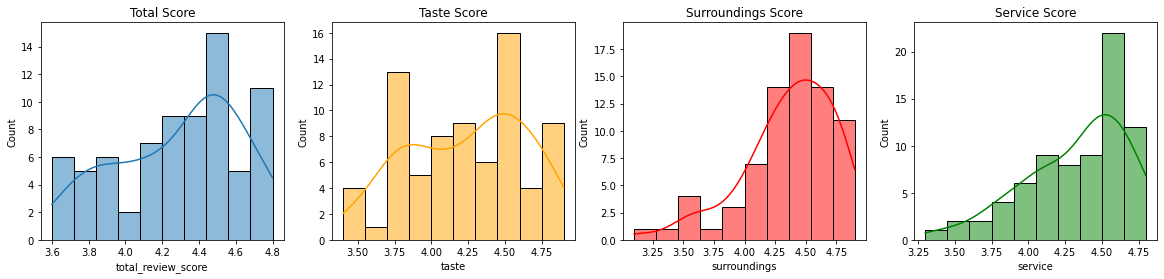

In [18]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.title('Total Score')
sns.histplot(df['total_review_score'], kde=True,bins=10)

plt.subplot(1, 4, 2)
plt.title('Taste Score')
sns.histplot(df['taste'], kde=True,bins=10, color='orange')

plt.subplot(1, 4, 3)
plt.title('Surroundings Score')
sns.histplot(df['surroundings'], kde=True, color='r',bins=10)

plt.subplot(1, 4, 4)
plt.title('Service Score')
sns.histplot(df['service'], kde=True, color='g',bins=10);

In [19]:
df.dtypes

price_per_person          int64
restaurant_id            object
restaurant               object
address                  object
total_review_score      float64
tag1                     object
tag2                     object
total_review_number       int64
taste                   float64
surroundings            float64
service                 float64
recommendation_1         object
recommendation_2         object
recommendation_3         object
medium_review_number      int64
good_review_number        int64
bad_review_number         int64
no_queues               float64
no_queues%              float64
dtype: object

In [21]:
df_analysis = df.drop(columns=['restaurant_id','address','tag1','tag2','recommendation_1','recommendation_2','recommendation_3','restaurant'])
df_analysis.head()

,price_per_person,total_review_score,total_review_number,taste,surroundings,service,medium_review_number,good_review_number,bad_review_number,no_queues,no_queues%
0,359,4.5,21190,4.6,4.2,4.5,2236,17601,1353,295.0,0.013922
1,141,4.1,4061,4.1,4.1,4.1,717,3066,278,102.0,0.025117
2,122,4.5,13914,4.4,4.5,4.5,1839,11482,593,216.0,0.015524
3,132,4.5,8627,4.4,4.4,4.4,1115,7083,429,172.0,0.019937
4,428,4.8,12024,4.8,4.8,4.8,834,10842,348,87.0,0.007236


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_analysis)
df_transformed = pd.DataFrame(scaler.transform(df_analysis), columns = df_analysis.columns)
df_transformed.head()

,price_per_person,total_review_score,total_review_number,taste,surroundings,service,medium_review_number,good_review_number,bad_review_number,no_queues,no_queues%
0,1.142191,0.626826,2.541198,0.908431,-0.439042,0.505914,2.741098,2.406456,3.479906,2.505418,0.319310
1,-0.572669,-0.563350,-0.403115,-0.334860,-0.708945,-0.643891,0.012884,-0.439816,-0.186204,0.287319,1.548987
2,-0.722129,0.626826,1.290522,0.411115,0.370667,0.505914,2.028063,1.208221,0.888051,1.597492,0.495301
3,-0.643466,0.626826,0.381737,0.411115,0.100764,0.218463,0.727715,0.346801,0.328756,1.091811,0.980071
4,1.684968,1.519458,0.965649,1.405747,1.180376,1.368268,0.223023,1.082895,0.052519,0.114927,-0.415086


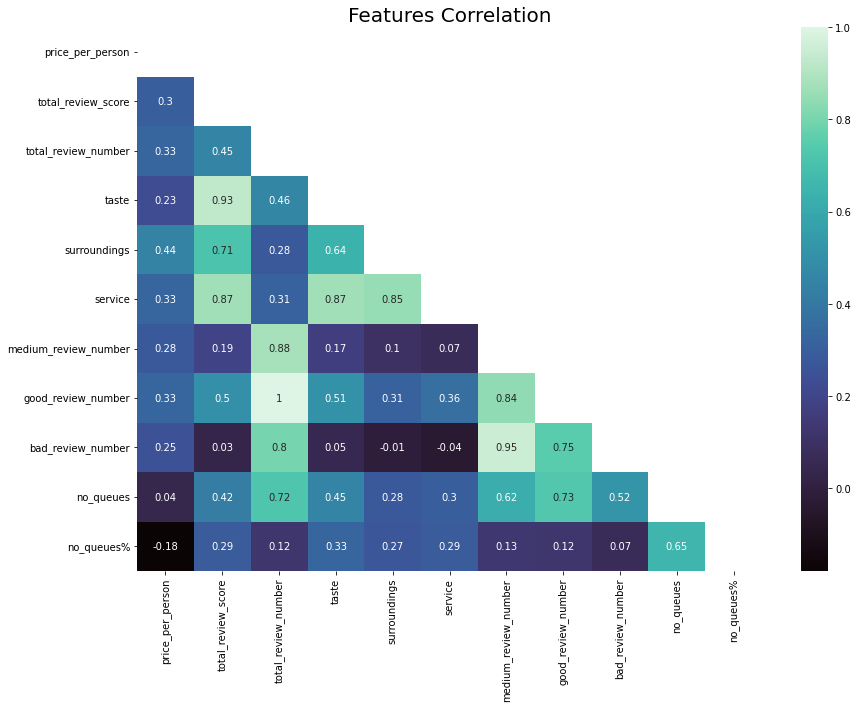

In [33]:
corrMatrix = round(df_transformed.corr(),2)
plt.figure(figsize=(14, 10))
plt.title("Features Correlation",fontsize=20)
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(corrMatrix, annot=True, cmap=cmap, mask=mask)
plt.show();

In [25]:
# Try different classification techniques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

In [26]:
df_features = df_transformed.drop('total_review_score',axis = 1)
df_target = df_transformed['total_review_score']

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 10,\
                                                    stratify = df_target)

In [35]:
linear.fit(X_train,list(y_train.values))
y_pred = linear.predict(X_test)
print(f'model score on training data: {linear.score(X_train, y_train)}')
print(f'model score on testing data: {linear.score(X_test, y_test)}')

model score on training data: 0.9434832166677165
model score on testing data: 0.8367204522630566


In [36]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV()
ridge.fit(X_train, y_train)

print(f'model score on training data: {ridge.score(X_train, y_train)}')
print(f'model score on testing data: {ridge.score(X_test, y_test)}')

model score on training data: 0.9290024369039244
model score on testing data: 0.7920012385650284


In [40]:
df_info = pd.read_excel("raw data/dianping_info.xlsx")
df_info = split_score(df_info)

In [42]:
dishes_list=df_info['推荐菜'].tolist()
dishes_list[1]

'["三文鱼", "阿根廷红虾", "缤纷水果", "法式羊排", "鲜活大闸蟹", "羊肉串", "鲜活鲍鱼", "现煮大虾", "冰激凌", "现烤生蚝", "活蒸大生蚝", "印度飞饼", "牛排", "安格斯牛肉", "鲜榨果汁", "小海鲜", "雪花和牛", "银鳕鱼", "牛蛙腿", "炭烤羊排", "刺身大咖1", "木瓜雪哈", "鸳鸯锅底", "烤鱿鱼", "西瓜", "烤鸭烤乳猪", "西点", "蒜蓉扇贝", "螃蟹", "大头虾", "日本寿司", "草莓", "自助的菜和火锅", "法式红酒牛舌", "羊蝎子", "三文鱼刺身", "基围虾", "三色果汁鸡尾酒", "澳洲黑牛上脑", "青口贝"]'

In [44]:
#3，分割组合成新列表
dishes_list_n=[]
for j in range(0,len(dishes_list)):
    for i in dishes_list[j].split(' '):
        dishes_list_n.append(i)
#4,清洗新列表的标点符号，便于后续排序计数
for i in range(0,len(dishes_list_n)):
    dishes_list_n[i]=dishes_list_n[i].replace("'"," ")
    dishes_list_n[i]=dishes_list_n[i].replace("["," ")
    dishes_list_n[i]=dishes_list_n[i].replace("]"," ")
    dishes_list_n[i]=dishes_list_n[i].replace(" ","")
    dishes_list_n[i]=dishes_list_n[i].replace(",","")
    dishes_list_n[i]=dishes_list_n[i].replace("……","")
#5,列表排序
dishes_list_n.sort()
#6,统计次数
dish_times=pd.value_counts(dishes_list_n).reset_index().rename(columns={'index':'推荐餐点',0:'被推荐次数'})
dish_times

,推荐餐点,被推荐次数
0,"""三文鱼""",30
1,"""冰淇淋""",21
2,"""北极贝""",20
3,"""水果""",20
4,"""扇贝""",20
...,...,...
1743,"""活体豆苗""",1
1744,"""洋葱圈""",1
1745,"""洋葱""",1
1746,"""泰国鲜椰""",1


In [49]:
! pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 38.5 kB/s eta 0:00:00a 0:00:01


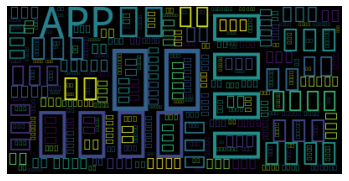

In [51]:
from wordcloud import WordCloud, ImageColorGenerator

# Start with one review:

text=" ".join(i for i in dish_times['推荐餐点'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [74]:
! pip install jieba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 4.2 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314478 sha256=ed9255302bd3c3ea7f8b7ea0d51e2ff667722e92241f2a6777b73294128c368d
  Stored in directory: /home/daisy/.cache/pip/wheels/ca/38/d8/dfdfe73bec1d12026b30cb7ce8da650f3f0ea2cf155ea018ae
Successfully built jieba


In [76]:
import pandas as pd
import jieba
from matplotlib import pyplot as plt

data = pd.read_csv('raw data/data1.csv')
data.head()

,cus_id,comment_time,comment_star,cus_comment,kouwei,huanjing,fuwu,shopID,stars,year,month,weekday,hour,comment_len
0,迷糊泰迪,2018/9/20 6:48,sml-str40,南信 算是 广州 著名 甜品店 吧 好几个 时间段 路过 都 是 座无虚席 看着 餐单 上 ...,非常好,好,好,518986,4.0,2018,9,3,6,184
1,稱霸幼稚園,2018/9/22 21:49,sml-str40,中午 吃 完 了 所谓 的 早茶 回去 放下 行李 休息 了 会 就 来 吃 下午茶 了 服...,很好,很好,很好,518986,4.0,2018,9,5,21,266
2,爱吃的美美侠,2018/9/22 22:16,sml-str40,冲刺 王者 战队 吃遍 蓉城 战队 有 特权 五月份 和 好 朋友 毕业 旅行 来 了 广州...,很好,很好,很好,518986,4.0,2018,9,5,22,341
3,姜姜会吃胖,2018/9/19 6:36,sml-str40,都 说来 广州 吃 糖水 就要 来南信 招牌 姜撞奶 红豆 双皮奶 牛 三星 云吞面 一楼 ...,非常好,很好,很好,518986,4.0,2018,9,2,6,197
4,forevercage,2018/8/24 17:58,sml-str50,一直 很 期待 也 最 爱 吃 甜品 广州 的 甜品 很 丰富 很 多样 来 之前 就 一直...,非常好,很好,很好,518986,5.0,2018,8,4,17,261


In [248]:
def zhuanhuan(score):
    if score > 3:
        return 1
    elif score < 3:
        return 0
    else:
        return None

In [55]:
data['target'] = data['stars'].map(lambda x:zhuanhuan(x))
data_model = data.dropna()

In [58]:
#切分测试集、训练集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_model['cus_comment'], data_model['target'], random_state=3, test_size=0.25)

#引入停用词
infile = open("raw data/cn_stopwords.txt",encoding='utf-8')
stopwords_lst = infile.readlines()
stopwords = [x.strip() for x in stopwords_lst]

#中文分词
def fenci(train_data):
    words_df = train_data.apply(lambda x:' '.join(jieba.cut(x)))
    return words_df
 
x_train[:5]

29998    能 用 电子 会员卡 可以 打折 新店 环境 不错 服务员 都 是 挺 礼貌 的 最大 问题...
19020    经过 文明 路 头 多数 都 系去 间 或者 玫瑰 百花 系 老字号 出品 当然 都 有 保...
22799    逛 到 北京路 就 来 找 这家 店 了 芝麻糊 和 双皮奶 都 好 棒 啊 润润 的 香香...
25547    经常 来 的 甜品店 三家 店面 但是 永远 满满 满 煎 粽 男票 最 爱多 绿豆 的 正...
748      一个 人来 的 拿 个 桌号 就 去 点单 贪心 如 我 姜撞奶 红豆 双皮奶 姜撞奶 不是...
Name: cus_comment, dtype: object

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words=stopwords, max_features=3000, ngram_range=(1,2))
tv.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=3000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['$', '0', '1', '2', '3', '4', '5', '6', '7', '8',
                            '9', '?', '_', '“', '”', '、', '。', '《', '》', '一',
                            '一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样',
                            '一般', '一转眼', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, f1_score
classifier = MultinomialNB()
classifier.fit(tv.transform(x_train), y_train)
classifier.score(tv.transform(x_test), y_test)

0.9272794389073459

In [61]:
y_pred = classifier.predict_proba(tv.transform(x_test))[:,1]
roc_auc_score(y_test,y_pred)

0.9094499777254503

In [217]:
def ceshi(model,strings):
    strings_fenci = fenci(pd.Series([strings]))
    return round(float(model.predict_proba(tv.transform(strings_fenci))[:,1]),2)

In [77]:
test1 = '很好吃，环境好，所有员工的态度都很好，上菜快，服务也很好，味道好吃，都是用蒸馏水煮的，推荐，超好吃' #5星好评
test2 = '糯米外皮不绵滑，豆沙馅粗躁，没有香甜味。12元一碗不值。' #1星差评
print('好评实例的模型预测情感得分为{}\n差评实例的模型预测情感得分为{}'.format(ceshi(classifier,test1),ceshi(classifier,test2)))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.934 seconds.
Prefix dict has been built successfully.


好评实例的模型预测情感得分为0.8672146726663207
差评实例的模型预测情感得分为0.8149772491054271


In [80]:
data_info =  pd.read_csv("raw data/dianping_info_v2.csv",encoding='utf-8')
data_info.head()

,_id,人均价格,优惠券信息,其他信息,图片链接,店铺id,店铺名,店铺地址,店铺均分,店铺总分,店铺电话,推荐菜,标签1,标签2,评论总数,详情链接
0,62d2259d0ed42af960648e3e,141,-,-,http://p0.meituan.net/biztone/713682670_165769...,j6sMBvEoL22p8x9P,威尼斯海鲜自助餐厅(壹丰广场店),四川北路1363号壹丰广场L3-A01、A01-1、A08（近四川北路4号口）,"{""口味"": ""4.1"", ""环境"": ""4.1"", ""服务"": ""4.2""}",4.1,021-614727**,-,自助餐,四川北路/海伦路,4065,https://www.dianping.com/shop/j6sMBvEoL22p8x9P
1,62d2259d0ed42af960648e3f,122,-,-,http://p0.meituan.net/biztone/193861411_165042...,G5tG02B1RMco2ydO,東盛自助料理(南京东路店),南京东路353号悦荟广场6楼601室（地铁2/10号线南京东路站1号口3号口出）,"{""口味"": ""4.4"", ""环境"": ""4.5"", ""服务"": ""4.5""}",4.5,021-633331**,-,自助餐,南京东路,13963,https://www.dianping.com/shop/G5tG02B1RMco2ydO
2,62d2259d0ed42af960648e40,132,-,-,http://p0.meituan.net/biztone/164178548_165719...,l1MCIbtbVyNohOzs,威尼斯海鲜自助餐厅(中环百联店),真光路1288号三楼B区G08-3F-1-B3F013商铺,"{""口味"": ""4.4"", ""环境"": ""4.4"", ""服务"": ""4.4""}",4.5,021-612301**,-,自助餐,梅川路步行街,8632,https://www.dianping.com/shop/l1MCIbtbVyNohOzs
3,62d2259e0ed42af960648e42,145,-,-,http://p0.meituan.net/biztone/41065860_1656485...,k99uXtE4UlJAdDip,五月罗马海鲜自助餐厅(百脑汇店),漕溪北路339号百脑汇5层,"{""口味"": ""4.0"", ""环境"": ""4.1"", ""服务"": ""4.1""}",4.1,021-602938**,-,自助餐,徐家汇,25298,https://www.dianping.com/shop/k99uXtE4UlJAdDip
4,62d2259e0ed42af960648e43,341,-,-,http://p0.meituan.net/biztone/381724_163668216...,l4C3aJCzL4ME7X2o,金茂君悦·食在56自助餐厅ON56,世纪大道88号,"{""口味"": ""4.1"", ""环境"": ""4.8"", ""服务"": ""4.6""}",4.3,021-616112**,-,自助餐,陆家嘴,5815,https://www.dianping.com/shop/l4C3aJCzL4ME7X2o


In [88]:
# data_review =  pd.read_csv("raw data/dianping_review_v2.csv",encoding='utf-8')
data_review =  pd.read_csv("raw data/dianping_review_v2.csv",encoding_errors='ignore')
data_review.dtypes

_id              object
中评个数              int64
好评个数              int64
差评个数              int64
带图评论个数            int64
                  ...  
Unnamed: 6262    object
Unnamed: 6263    object
Unnamed: 6264    object
Unnamed: 6265    object
Unnamed: 6266    object
Length: 6267, dtype: object

In [89]:
data_review.columns

Index(['_id', '中评个数', '好评个数', '差评个数', '带图评论个数', '店铺id', '精选评?评论总数', '评论摘要',
       'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 6257', 'Unnamed: 6258', 'Unnamed: 6259', 'Unnamed: 6260',
       'Unnamed: 6261', 'Unnamed: 6262', 'Unnamed: 6263', 'Unnamed: 6264',
       'Unnamed: 6265', 'Unnamed: 6266'],
      dtype='object', length=6267)

In [98]:
col = ['中评个数', '好评个数', '差评个数', '带图评论个数', '店铺id', '精选评?评论总数', '评论摘要']
data_review_c = data_review[col]
data_review_c.head()

,中评个数,好评个数,差评个数,带图评论个数,店铺id,精选评?评论总数,评论摘要
0,689,8284,168,7436,G3kqUzPlKVzjot6d,"[{""店铺id"": ""G3kqUzPlKVzjot6d"", ""评论id"": 11114208...","""""用户总分"""": 45"
1,591,5850,127,3254,G3apDW3AalisPib3,"[{""店铺id"": ""G3apDW3AalisPib3"", ""评论id"": 11114982...","""""用户总分"""": 40"
2,3081,20079,1128,19558,i9GeZGuLXJwQnTQ6,"[{""店铺id"": ""i9GeZGuLXJwQnTQ6"", ""评论id"": 11124385...","""""用户总分"""": 45"
3,130,1955,42,1450,G2lt39A8CYpo3jto,"[{""店铺id"": ""G2lt39A8CYpo3jto"", ""评论id"": 11128018...","""""用户总分"""": 50"
4,662,4193,161,3901,k4jknwB2Pg5KKiwB,"[{""店铺id"": ""k4jknwB2Pg5KKiwB"", ""评论id"": 11140251...","""""用户总分"""": 45"


In [101]:
d = pd.read_csv("raw data/review_1.csv")
d.head()

,_id,中评个数,好评个数,差评个数,带图评论个数,店铺id,精选评论
0,62d7e456db83171f01c8f197,618,11839,361,6964,l9qwmkX3FoD9tExc,"[{""店铺id"": ""l9qwmkX3FoD9tExc"", ""评论id"": ""1115311..."
1,62d7e51ddb83171f01c8f199,827,5725,385,4963,G5m7i2bxuLsQFx6T,"[{""店铺id"": ""G5m7i2bxuLsQFx6T"", ""评论id"": ""1112809..."
2,62d7e5e8db83171f01c8f19b,113,1378,73,1170,k6HJhxChmqIGrO6t,"[{""店铺id"": ""k6HJhxChmqIGrO6t"", ""评论id"": ""1116252..."
3,62d7e6b7db83171f01c8f19d,4168,26637,1185,26743,k6GAT6Sri8LG9voi,"[{""店铺id"": ""k6GAT6Sri8LG9voi"", ""评论id"": ""1115964..."
4,62d7e780db83171f01c8f19f,1158,15374,643,7512,k988VwAzILEm0LY9,"[{""店铺id"": ""k988VwAzILEm0LY9"", ""评论id"": ""1115172..."


In [102]:
d2 = pd.read_csv("raw data/review_2.csv")
d2.head()

,_id,中评个数,好评个数,差评个数,带图评论个数,店铺id,精选评论,评论总数,评论摘要
0,62d227c6c213f5e8385c3c8a,689,8284,168,7436,G3kqUzPlKVzjot6d,"[{""店铺id"": ""G3kqUzPlKVzjot6d"", ""评论id"": 11114208...",9141,"[{""描述"": ""夜景赞"", ""个数"": 257}, {""描述"": ""不用排队"", ""个数""..."
1,62d227cdc213f5e8385c3c8c,591,5850,127,3254,G3apDW3AalisPib3,"[{""店铺id"": ""G3apDW3AalisPib3"", ""评论id"": 11114982...",6568,"[{""描述"": ""上菜快"", ""个数"": 110}, {""描述"": ""不用排队"", ""个数""..."
2,62d227cec213f5e8385c3c8e,3081,20079,1128,19558,i9GeZGuLXJwQnTQ6,"[{""店铺id"": ""i9GeZGuLXJwQnTQ6"", ""评论id"": 11124385...",24288,"[{""描述"": ""菜品健康"", ""个数"": 1759}, {""描述"": ""不用排队"", ""个..."
3,62d227cfc213f5e8385c3c90,130,1955,42,1450,G2lt39A8CYpo3jto,"[{""店铺id"": ""G2lt39A8CYpo3jto"", ""评论id"": 11128018...",2127,"[{""描述"": ""菜品健康"", ""个数"": 93}, {""描述"": ""上菜快"", ""个数"":..."
4,62d227d1c213f5e8385c3c92,662,4193,161,3901,k4jknwB2Pg5KKiwB,"[{""店铺id"": ""k4jknwB2Pg5KKiwB"", ""评论id"": 11140251...",5016,"[{""描述"": ""上菜快"", ""个数"": 127}, {""描述"": ""不用排队"", ""个数""..."


In [197]:
d3 = pd.read_csv("raw data/dianping_review_test.csv",encoding='utf-8')
d3.head()

,_id,中评个数,好评个数,差评个数,带图评论个数,店铺id,推荐菜,精选评论,评论总数,评论摘要
0,62db5b0c817bf9b8a5707520,567,3513,226,3191,l1KkGwL9nhdbxYJG,-,"[{""店铺id"": ""l1KkGwL9nhdbxYJG"", ""评论id"": ""1109187...",4306,"[{""描述"": ""菜品健康"", ""个数"": ""310""}, {""描述"": ""不用排队"", ""..."
1,62db5bd3817bf9b8a5707522,1123,11613,327,5205,G6lUt8p6xQvkx4jf,-,"[{""店铺id"": ""G6lUt8p6xQvkx4jf"", ""评论id"": ""1116490...",13063,"[{""描述"": ""上菜快"", ""个数"": ""168""}, {""描述"": ""不用排队"", ""个..."
2,62db5c97817bf9b8a5707524,91,777,105,674,l26n8GRljBs37jw0,-,"[{""店铺id"": ""l26n8GRljBs37jw0"", ""评论id"": ""1117401...",973,"[{""描述"": ""牛肉赞"", ""个数"": ""49""}, {""描述"": ""不用排队"", ""个数..."
3,62db5d63817bf9b8a5707526,543,3353,247,3108,H1AqU2oV2LZE1Eiw,-,"[{""店铺id"": ""H1AqU2oV2LZE1Eiw"", ""评论id"": ""1117591...",4143,"[{""描述"": ""菜品健康"", ""个数"": ""212""}, {""描述"": ""不用排队"", ""..."
4,62db5e2b817bf9b8a5707528,1409,6343,634,2457,k7hEx6fVSx6Z75W2,-,"[{""店铺id"": ""k7hEx6fVSx6Z75W2"", ""评论id"": ""1117017...",8386,"[{""描述"": ""菜品健康"", ""个数"": ""337""}, {""描述"": ""不用排队"", ""..."


In [198]:
d3['精选评论'] = d3['精选评论'].map(lambda x:simplejson.loads(x))
# tmp = d3['精选评论'].replace('\t','').replace('\n','').replace(',}','}').replace(',]',']')
# d3 = json.loads(tmp)
# d3['精选评论'].apply(pd.Series)

In [199]:
# df_review = d3['精选评论'].explode().reset_index(drop=True)
# df_review = df_review.join(pd.json_normalize(df.col2)).drop(columns=['col2'])

# use explode to give each dict in a list a separate row
df_review = pd.DataFrame(d3.精选评论.explode().reset_index(drop=True))

# normalize the column of dicts, join back to the remaining dataframe columns, and drop the unneeded column
df_review = pd.json_normalize(df_review.精选评论)
df_review_NLP = df_review[['评论内容','用户总分','店铺id']]

In [265]:
df_review_NLP['评论内容'] = df_review_NLP['评论内容'].apply(lambda x:' '.join(jieba.cut(x)))

/tmp/ipykernel_7023/2206967058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_NLP['评论内容'] = df_review_NLP['评论内容'].apply(lambda x:' '.join(jieba.cut(x)))


In [266]:
cols = ['用户总分','用户打分.口味','用户打分.环境','用户打分.服务']

for i in cols:
    df_review_NLP[i] = pd.to_numeric(df_review_NLP[i],errors='coerce')

/tmp/ipykernel_7023/846175526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_NLP[i] = pd.to_numeric(df_review_NLP[i],errors='coerce')


In [268]:
df_review_NLP['target'] = df_review_NLP['用户总分'].map(lambda x:zhuanhuan(x))
df_model = df_review_NLP.dropna()

/tmp/ipykernel_7023/3384253146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_NLP['target'] = df_review_NLP['用户总分'].map(lambda x:zhuanhuan(x))


In [269]:
x_train, x_test, y_train, y_test = train_test_split(df_model['评论内容'], df_model['target'], random_state=3, test_size=0.25)

In [270]:
tv.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=3000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['$', '0', '1', '2', '3', '4', '5', '6', '7', '8',
                            '9', '?', '_', '“', '”', '、', '。', '《', '》', '一',
                            '一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样',
                            '一般', '一转眼', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [271]:
classifier = MultinomialNB()
classifier.fit(tv.transform(x_train), y_train)
classifier.score(tv.transform(x_test), y_test)

0.9495908346972177

In [272]:
y_pred = classifier.predict_proba(tv.transform(x_test))[:,1]
roc_auc_score(y_test,y_pred)

0.8883624992725303

In [273]:
test1 = '很好吃，环境好，所有员工的态度都很好，上菜快，服务也很好，味道好吃，都是用蒸馏水煮的，推荐，超好吃' #5星好评
test2 = '糯米外皮不绵滑，豆沙馅粗躁，没有香甜味。12元一碗不值，不好吃。' #1星差评
print('好评实例的模型预测情感得分为{}\n差评实例的模型预测情感得分为{}'.format(ceshi(classifier,test1),ceshi(classifier,test2)))

好评实例的模型预测情感得分为0.98
差评实例的模型预测情感得分为0.86


In [274]:
df_review_NLP['target'].value_counts()

1.0    11581
0.0      638
Name: target, dtype: int64

In [275]:
index_tmp = y_train==0
y_tmp = y_train[index_tmp]
x_tmp = x_train[index_tmp]
x_train2 = pd.concat([x_train,x_tmp,x_tmp,x_tmp,x_tmp,x_tmp,x_tmp,x_tmp,x_tmp,x_tmp,x_tmp])
y_train2 = pd.concat([y_train,y_tmp,y_tmp,y_tmp,y_tmp,y_tmp,y_tmp,y_tmp,y_tmp,y_tmp,y_tmp])

In [276]:
clf2 = MultinomialNB()
clf2.fit(tv.transform(x_train2), y_train2)
y_pred2 = clf2.predict_proba(tv.transform(x_test))[:,1]
roc_auc_score(y_test,y_pred2)

0.9301192602640378

In [279]:
print(ceshi(clf2,'排队人太多，环境不好，口味一般，不好吃'))
print(ceshi(clf2,'很好吃，环境好，超好吃'))

0.79
0.9


In [1]:
from nlp import nlp_score,review_clean

In [293]:
pd.read_csv("raw_data/dianping_review_test.csv",encoding='utf-8').head()

,_id,中评个数,好评个数,差评个数,带图评论个数,店铺id,推荐菜,精选评论,评论总数,评论摘要
0,62db5b0c817bf9b8a5707520,567,3513,226,3191,l1KkGwL9nhdbxYJG,-,"[{""店铺id"": ""l1KkGwL9nhdbxYJG"", ""评论id"": ""1109187...",4306,"[{""描述"": ""菜品健康"", ""个数"": ""310""}, {""描述"": ""不用排队"", ""..."
1,62db5bd3817bf9b8a5707522,1123,11613,327,5205,G6lUt8p6xQvkx4jf,-,"[{""店铺id"": ""G6lUt8p6xQvkx4jf"", ""评论id"": ""1116490...",13063,"[{""描述"": ""上菜快"", ""个数"": ""168""}, {""描述"": ""不用排队"", ""个..."
2,62db5c97817bf9b8a5707524,91,777,105,674,l26n8GRljBs37jw0,-,"[{""店铺id"": ""l26n8GRljBs37jw0"", ""评论id"": ""1117401...",973,"[{""描述"": ""牛肉赞"", ""个数"": ""49""}, {""描述"": ""不用排队"", ""个数..."
3,62db5d63817bf9b8a5707526,543,3353,247,3108,H1AqU2oV2LZE1Eiw,-,"[{""店铺id"": ""H1AqU2oV2LZE1Eiw"", ""评论id"": ""1117591...",4143,"[{""描述"": ""菜品健康"", ""个数"": ""212""}, {""描述"": ""不用排队"", ""..."
4,62db5e2b817bf9b8a5707528,1409,6343,634,2457,k7hEx6fVSx6Z75W2,-,"[{""店铺id"": ""k7hEx6fVSx6Z75W2"", ""评论id"": ""1117017...",8386,"[{""描述"": ""菜品健康"", ""个数"": ""337""}, {""描述"": ""不用排队"", ""..."


In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import jieba
import simplejson
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, f1_score

In [11]:
df = review_clean(pd.read_csv("raw_data/dianping_review_test.csv",encoding='utf-8'))
df.head()

,评论内容,用户总分,店铺id
0,平台上买的他家的双人套餐，真的非常非常实在，份量足，味道也很好，推荐推荐 他家是自助铁板烤...,5.0,l1KkGwL9nhdbxYJG
1,三月份就中的霸王餐被疫情耽搁到现在才去吃真痛苦 这家韩聚场平时也常吃，特色的石板烤肉蛮少见的...,5.0,l1KkGwL9nhdbxYJG
2,呼呼离谱三人行，人均92吃成了143哈哈哈哈 场地很大，没排队就直接入座啦～服务员也很麻利...,5.0,l1KkGwL9nhdbxYJG
3,刷某音看到就团了一个随便挑个日子就去了周二6点多店里人不多套餐里有4种肉肉一个菇一份炒年糕还...,4.5,l1KkGwL9nhdbxYJG
4,解封之后的第一顿烤肉！用餐感受还是非常满意的，可能正好也是赶上肚子饿，吃的可香了，哈哈～肉都...,4.5,l1KkGwL9nhdbxYJG


In [17]:
nlp_score("raw_data/dianping_review_test.csv")

ValueError: Expected 2D array, got 1D array instead:
array=[<1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.